In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve



# Import data

In [2]:
lead_df=pd.read_csv("Leads.csv")
pd.set_option('display.max_columns',None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the dataframe

In [3]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Missing data percentage
round(lead_df.isnull().sum()/lead_df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

# Data preparation
converting 1/0

In [6]:
#Encoding the variable with yes/no
for feature in ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
               ,'I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
        lead_df[feature]=lead_df[feature].apply(lambda x : 1 if x =='yes'else 0)  
                                                
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [7]:
#Listing the categorial variable yet to be encoded
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [8]:
#Checking the labels for remaining categorial columns
for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print (col)
    print("                                                                                ")
    print(lead_df[col].value_counts(normalize=True))
    print("                                                                                ")
    

Lead Origin
                                                                                
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
                                                                                
Lead Source
                                                                                
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnbl

In [9]:
#Converting all selects to NaN
lead_df=lead_df.replace('Select',np.nan)


In [10]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Missing value handling

In [11]:
#Dropping columns having null values more  than 70%
lead_df=lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0],2)>0.70)].columns,1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\1635781877.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df=lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0],2)>0.70)].columns,1)


In [12]:
#replace from nan to 'Not sure'
lead_df['Lead Quality']=lead_df['Lead Quality'].replace(np.nan,'Not Sure')

In [13]:
lead_df=lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'
                     ],1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\2492614797.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df=lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'


In [14]:
#We can input the Mumbai into all the nulls as most of the null values belongs to Mumbai
lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

#Input nan in 3 specialisation sections
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Other_Specialization')

#Input null values in the tag column having more than 30% of 'will revert after reading the email'
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

#Input null values for more than 99% is of "Better career prospects"
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better career prospects')

# Input null value having 85% data in Unemployed section
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

# Input null value having 95% data in country section in 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')



In [15]:
# Checking missing data percentage in updated dataframe
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [16]:
# Remaining null values are less than 2% and then can directly dropped
lead_df.dropna(inplace=True)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Other_Specialization,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


# EDA

In [17]:
#Start with a target variable if any data imbalace
lead_df['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

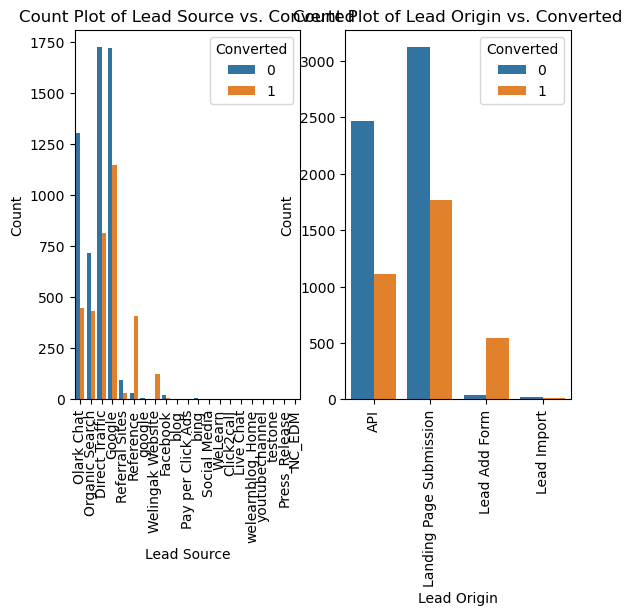

In [18]:
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=lead_df, x=feature, hue='Converted')
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {feature} vs. Converted')

# Show the plots
plt.show()

In [19]:
# Count of leads from various sources are close to negligible so to put into 'others'section
lead_df['Lead Source']=lead_df['Lead Source'].replace(['Click2call','Live Chat','NC_EDM','Pay per Click Ads','Press_Release'
        ,'Social Media','welearn','bing','blog','testone','welearnblog_Home','youtubechannel'],'Other_Lead Source')

lead_df['Lead Source']=lead_df['Lead Source'].replace("google",'Google')

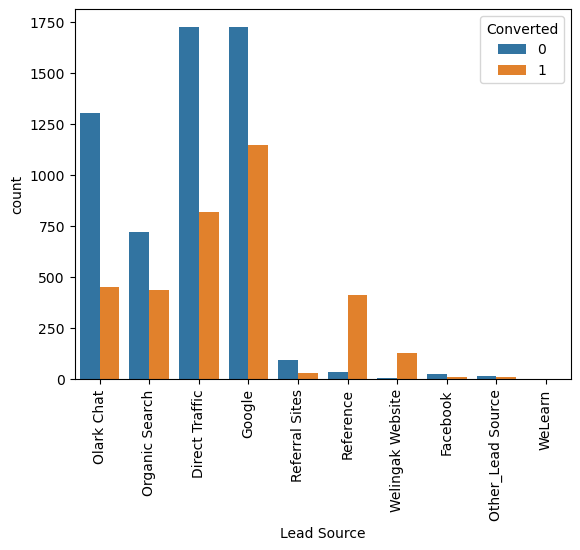

In [20]:
#Plotting lead source again
sns.countplot(x='Lead Source',hue='Converted',data=lead_df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\3953912409.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


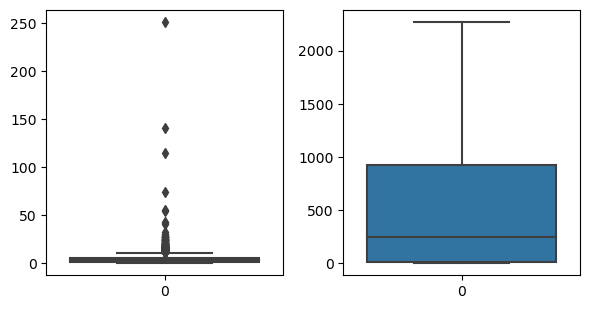

In [21]:
# Set the figure size
fig=plt.subplots(figsize=(6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout()
    
plt.show()


In [22]:
# many outliers in the totalvisits so we cap to 95 percentile
q1=lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >=q1] =q1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\1069222006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_df["TotalVisits"][lead_df["TotalVisits"] >=q1] =q1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\2347362195.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


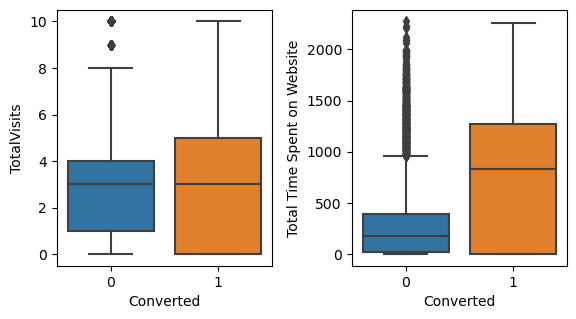

In [23]:
fig=plt.subplots(figsize=(6,6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(y=feature, x='Converted',data=lead_df)
    plt.tight_layout()
    
plt.show()

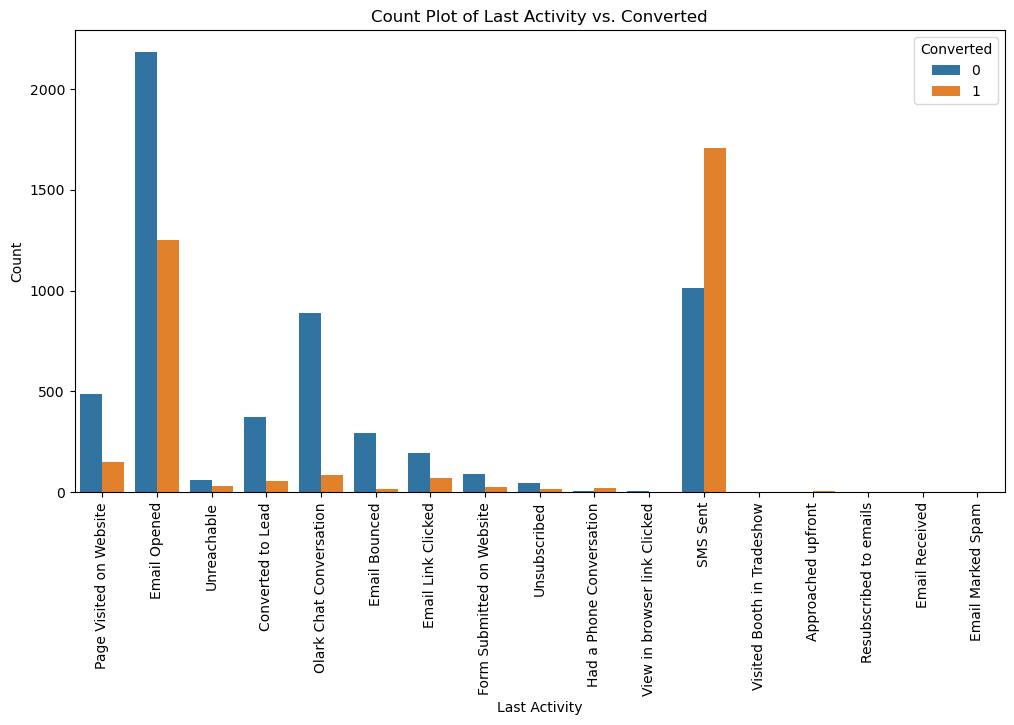

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Last Activity", hue="Converted", data=lead_df)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically for readability
plt.xlabel("Last Activity")
plt.ylabel("Count")
plt.title("Count Plot of Last Activity vs. Converted")
plt.legend(title="Converted", loc='upper right')
plt.show()

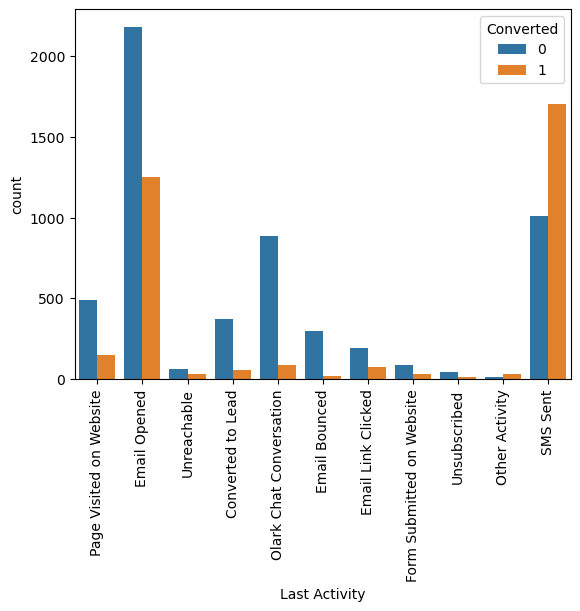

In [24]:
# Converting all low count  category into other section

lead_df['Last Activity']=lead_df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow'
            ,'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Other Activity')

#Plot the last activity again

sns.countplot(x="Last Activity", hue="Converted", data=lead_df)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\1117616633.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


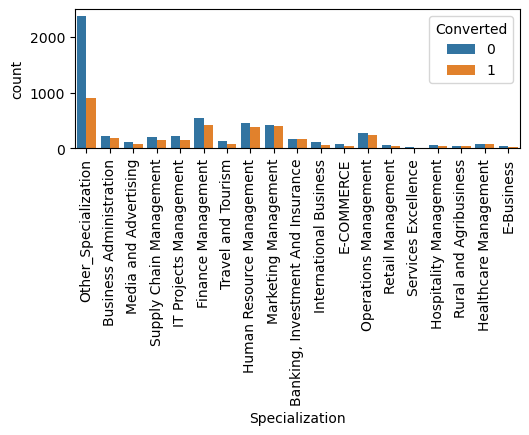

In [25]:
# Set the figure size
fig=plt.subplots(figsize=(10,6))

for i, feature in enumerate(["Specialization"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot (x=feature, hue="Converted", data=lead_df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
plt.show()    


    


In [26]:
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace("Other",'Other_Occupation')

In [27]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"
        ,"Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
         "A free copy of Mastering The Interview"]].describe()

,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0,9074.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\579901527.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


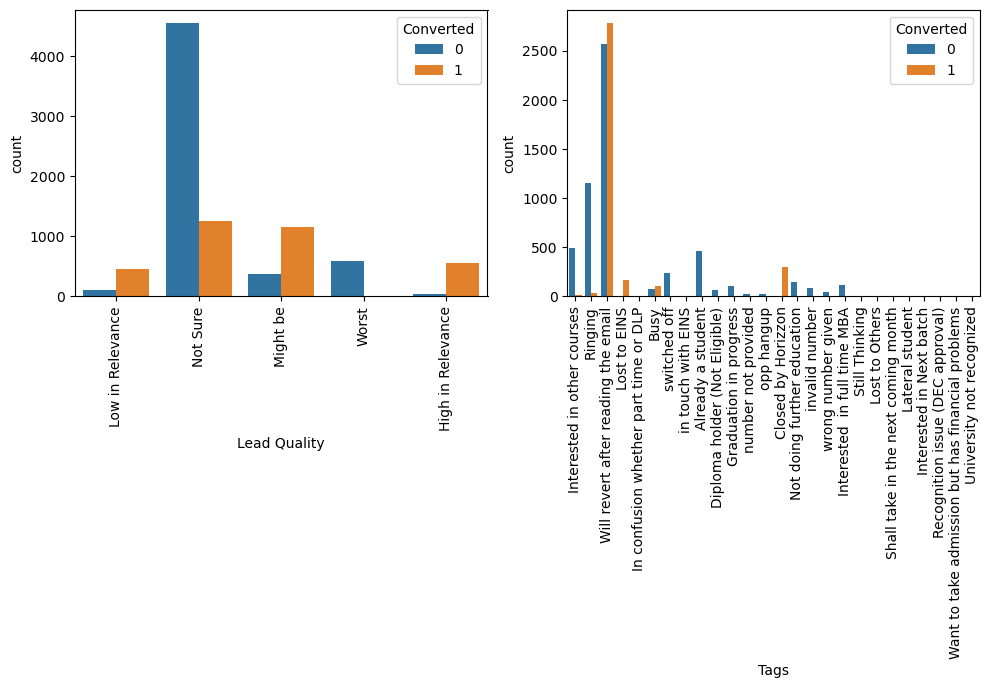

In [28]:
# Set the figure size
fig=plt.subplots(figsize=(10,10))

for i, feature in enumerate(["Lead Quality","Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.countplot (x=feature, hue="Converted", data=lead_df)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
  

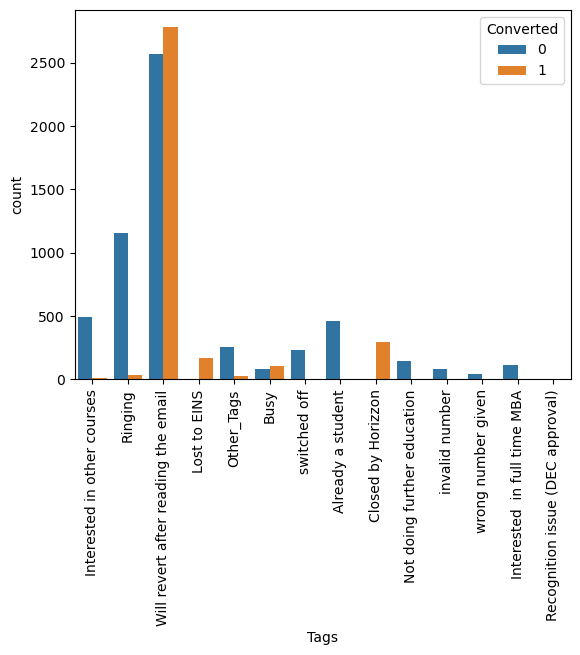

In [29]:
#Converting to all low count category to other category
lead_df['Tags']=lead_df['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)'
 ,'Approched upfront','Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others',
'Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue(DEC approval)',
'Want to take admission but has financial problems','University not recognized'],'Other_Tags')

#Plot the Tags again
sns.countplot (x="Tags", hue="Converted", data=lead_df)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
# Dropping unnecessary columns
lead_df=lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                        
'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                        
'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                        
'A free copy of Mastering The Interview','Country','Do Not Call'],1)

lead_df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\2224444180.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df=lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Dummy variable creation

In [31]:
dummy=pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
lead_df=lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'],axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [33]:
lead_df=pd.concat([lead_df,dummy],axis=1)
lead_df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Test train split


In [34]:
#putting feature variable to X
x=lead_df.drop(['Prospect ID', 'Converted'],axis=1)
#putting response vaqriable to y
y=lead_df['Converted']
print(y)
x.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [35]:
#splitting the date into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

# Feature scaling

In [36]:
scaler=StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_WeLearn,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
# Checking the conversion rate
print("Conversion rate is ",(sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


# Looking correlations

In [38]:
#Correlations between different numerical variables for both the converted and non-converted cases
conv_corr=lead_df.corr()

#Correlations matric to find out top correlations
conv_corr_unstacked=conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\3944792520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  conv_corr=lead_df.corr()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\3944792520.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Import                Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                             0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                            Page Views Per Visit                              0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website     0.691811
Last Activity_Unreachable              Last Notable Activity_Unreachable                 0.594369
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.576457
dtype: float64

In [39]:
#Dropping highly correlated feature
x_test=x_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked',
'Last Notable Activity_Page Visited on Website'],1)

x_train=x_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
'Last Notable Activity_Email Opened','Last Notable Activity_Unreachable','Last Notable Activity_Email Link Clicked',
'Last Notable Activity_Page Visited on Website'],1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\3819457317.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=x_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\3819457317.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=x_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_SMS Sent',


In [40]:
conv_corr=x_train.corr()

In [41]:
conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9456\52485775.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conv_corr.where(np.triu(np.ones(conv_corr.shape),k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)


Lead Origin_Lead Add Form              Lead Source_Reference                             0.859537
TotalVisits                            Page Views Per Visit                              0.756104
Last Activity_Other Activity           Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat                 Specialization_Other_Specialization               0.505771
Page Views Per Visit                   Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form              Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced            Last Notable Activity_Email Bounced               0.450911
TotalVisits                            Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation             0.419173
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation     0.406150
dtype: float64

# Model Building

In [42]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\Administrator\.ms-ad\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Administrator\.ms-ad\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\Administrator\.ms-ad\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       71196.
Time:                        12:26:41   Pearson chi2:                 3.48e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 7.931e+14    2.9e+07   2.74e+07      0.000    7.93e+14    7.93e+14
Do Not Email                                            11.1937   1.68e-07   6.65e+07      0.000      11.194      11.194
TotalVisits                                           3.263e+13   1.44e+06   2.27e+07      0.000    3.26e+13    3.26e+13
Total Time Spent on Website                           3.204e+14   1.02e+06   3.14e+08      0.000     3.2e+14     3.2e+14
Page Views Per Visit                                 -6.297e+13   1.42e+06  -4.43e+07      0.000    -6.3e+13    -6.3e+13
Lead Origin_Landing Page Submission                  -2.975e+14   3.37e+06  -8.84e+07      0.000   -2.98e+14   -2.98e+14
Lead Origin_Lead Add Form                             3.365e+14   2.87e+07   1.17e+07      0.000    3.37e+14    3.37e+14
Lead Origin_Lead Import                               7.245e+14   1.43e+07   5.08e+07      0.000    7.24e+14    7.24e+14
Lead Source_Google                                    9.343e+13   2.44e+06   3.83e+07      0.000    9.34e+13    9.34e+13
Lead Source_Olark Chat                                2.752e+14   3.88e+06   7.09e+07      0.000    2.75e+14    2.75e+14
Lead Source_Organic Search                            8.935e+13   3.21e+06   2.78e+07      0.000    8.93e+13    8.93e+13
Lead Source_Other_Lead Source                         8.978e+13   1.85e+07   4.85e+06      0.000    8.98e+13    8.98e+13
Lead Source_Reference                                -2.088e+13    2.9e+07  -7.21e+05      0.000   -2.09e+13   -2.09e+13
Lead Source_Referral Sites                            5.844e+13   7.85e+06   7.45e+06      0.000    5.84e+13    5.84e+13
Lead Source_WeLearn                                     -8.3955   2.05e-07  -4.09e+07      0.000      -8.395      -8.395
Lead Source_Welingak Website                          2.536e+14   2.95e+07    8.6e+06      0.000    2.54e+14    2.54e+14
Last Activity_Email Bounced                          -3.788e+14   6.59e+06  -5.75e+07      0.000   -3.79e+14   -3.79e+14
Last Activity_Email Link Clicked                     -5.845e+14   6.74e+06  -8.67e+07      0.000   -5.85e+14   -5.85e+14
Last Activity_Email Opened                           -2.144e+14   4.79e+06  -4.48e+07      0.000   -2.14e+14   -2.14e+14
Last Activity_Form Submitted on Website               1.389e+14   8.91e+06   1.56e+07      0.000    1.39e+14    1.39e+14
Last Activity_Olark Chat Conversation                 3.646e+12   5.28e+06   6.91e+05      0.000    3.65e+12    3.65e+12
Last Activity_Other Activity                          6.158e+14   1.69e+07   3.64e+07      0.000    6.16e+14    6.16e+14
Last Activity_Page Visited on Website                -3.23

# Feature selection using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)     # running RFE with 15 variable as output
rfe = rfe.fit(x_train,y_train)

C:\Users\Administrator\.ms-ad\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\.ms-ad\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [52]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False])

In [53]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 41),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other_Lead Source', False, 10),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unre

In [54]:
col=x_train.columns[rfe.support_]

In [55]:
#Assessing the model with stats model
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1295.0
Date:                Tue, 10 Oct 2023   Deviance:                       2590.0
Time:                        12:33:12   Pearson chi2:                 3.00e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6036
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1934      1.356      0.880      0.379      -1.465       3.852
Total Time Spent on Website                              1.1426      0.062     18.390      0.000       1.021       1.264
Lead Origin_Landing Page Submission                     -1.1705      0.208     -5.618      0.000      -1.579      -0.762
Lead Origin_Lead Add Form                                1.1889      0.392      3.034      0.002       0.421       1.957
Lead Origin_Lead Import                                  0.9423      0.783      1.203      0.229      -0.593       2.477
Lead Source_Olark Chat                                   0.8742      0.165      5.290      0.000       0.550       1.198
Lead Source_Welingak Website                             3.7774      0.830      4.554      0.000       2.152       5.403
Last Activity_Email Bounced                             -1.0319      0.481     -2.145      0.032      -1.975      -0.089
Last Activity_Email Link Clicked                        -0.4369      0.318     -1.374      0.169      -1.060       0.186
Last Activity_Olark Chat Conversation                   -0.1933      0.265     -0.730      0.465      -0.712       0.326
Last Activity_Other Activity                             1.5333      0.866      1.770      0.077      -0.165       3.231
Last Activity_SMS Sent                                   1.9580      0.120     16.346      0.000       1.723       2.193
Last Activity_Unreachable                                0.9547      0.465      2.053      0.040       0.043       1.866
Specialization_E-COMMERCE                                0.8869      0.479      1.850      0.064      -0.053       1.826
Specialization_International Business                   -0.5559      0.354     -1.571      0.116      -1.249       0.138
Specialization_Marketing Management                      0.3673      0.198      1.855      0.064      -0.021       0.755
Specialization_Other_Specialization                     -0.4833      0.203     -2.380      0.017      -0.881      -0.085
Specialization_Travel and Tourism                       -0.4133      0.409     -1.010      0.312      -1.215       0.389
What is your current occupation_Student                 -1.3867      1.186     -1.170      0.242      -3.710       0.937
What is your current occupation_Unemployed              -1.9463      1.069     -1.821      0.069      -4.041       0.148
What is your current occupation_Working Professional    -0.6721      1.110     -0.605      0.545      -2.848       1.504
Tags_Busy                                                3.9287      0.831      4.726      0.000       2.299       5.558
Tags_Closed by Horizzon                                  9

In [56]:
# Getting the predicted values on the train set
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

3009    0.140514
1012    0.076839
9226    0.002942
4750    0.929232
7987    0.998714
1281    0.984641
2880    0.066927
4971    0.956771
7536    0.995043
1248    0.014078
dtype: float64

In [57]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14051391, 0.07683854, 0.00294216, 0.92923177, 0.99871398,
       0.98464102, 0.06692748, 0.95677077, 0.99504318, 0.01407842])

# creating a data frame with true conversion status

In [58]:
y_train_pred_final=pd.DataFrame({'Convert':y_train.values,'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID']=y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.140514,3009
1,0,0.076839,1012
2,0,0.002942,9226
3,1,0.929232,4750
4,1,0.998714,7987


In [59]:
# Creating a new column 'predicted' with 1 if convert_prob>0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.140514,3009,0
1,0,0.076839,1012,0
2,0,0.002942,9226,0
3,1,0.929232,4750,1
4,1,0.998714,7987,1


In [60]:
print("Accuracy score",metrics.accuracy_score(y_train_pred_final.Convert,y_train_pred_final.predicted))

Accuracy score 0.9245788064871674


# creating VIFs

In [62]:
def calculate_vif(x_train):
    vif_df=pd.DataFrame()
    vif_df['Features']=x_train.columns
    vif_df['Variance Inflation Factor']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
    vif_df['Variance Inflation Factor']=round(vif_df['Variance Inflation Factor'],2)
    vif_df=vif_df.sort_values(by='Variance Inflation Factor',ascending=False)
    print(vif_df)
    
calculate_vif(x_train[col])

                                             Features  \
18         What is your current occupation_Unemployed   
29           Tags_Will revert after reading the email   
34                              Lead Quality_Not Sure   
1                 Lead Origin_Landing Page Submission   
15                Specialization_Other_Specialization   
28                                       Tags_Ringing   
19  What is your current occupation_Working Profes...   
33                              Lead Quality_Might be   
23                   Tags_Interested in other courses   
4                              Lead Source_Olark Chat   
35                                 Lead Quality_Worst   
2                           Lead Origin_Lead Add Form   
37                     Last Notable Activity_Modified   
21                            Tags_Closed by Horizzon   
8               Last Activity_Olark Chat Conversation   
10                             Last Activity_SMS Sent   
17            What is your curr

In [63]:
col=col.drop('Tags_invalid number')
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Other_Specialization',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Oth

In [64]:
# re-run the model using the selected variable
x_train_sm=sm.add_constant(x_train[col])
logm=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1296.7
Date:                Tue, 10 Oct 2023   Deviance:                       2593.4
Time:                        14:53:44   Pearson chi2:                 2.96e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3552      1.352      0.263      0.793      -2.295       3.005
Total Time Spent on Website                              1.1419      0.062     18.394      0.000       1.020       1.264
Lead Origin_Landing Page Submission                     -1.1706      0.208     -5.618      0.000      -1.579      -0.762
Lead Origin_Lead Add Form                                1.1918      0.392      3.043      0.002       0.424       1.959
Lead Origin_Lead Import                                  0.9418      0.783      1.204      0.229      -0.592       2.476
Lead Source_Olark Chat                                   0.8733      0.165      5.288      0.000       0.550       1.197
Lead Source_Welingak Website                             3.7721      0.829      4.548      0.000       2.147       5.398
Last Activity_Email Bounced                             -1.0373      0.481     -2.157      0.031      -1.980      -0.095
Last Activity_Email Link Clicked                        -0.4379      0.318     -1.376      0.169      -1.061       0.186
Last Activity_Olark Chat Conversation                   -0.1974      0.265     -0.746      0.456      -0.716       0.321
Last Activity_Other Activity                             1.5402      0.869      1.773      0.076      -0.163       3.243
Last Activity_SMS Sent                                   1.9471      0.119     16.306      0.000       1.713       2.181
Last Activity_Unreachable                                0.9519      0.465      2.048      0.041       0.041       1.863
Specialization_E-COMMERCE                                0.8869      0.479      1.852      0.064      -0.052       1.826
Specialization_International Business                   -0.5503      0.354     -1.555      0.120      -1.244       0.144
Specialization_Marketing Management                      0.3709      0.198      1.872      0.061      -0.017       0.759
Specialization_Other_Specialization                     -0.4810      0.203     -2.369      0.018      -0.879      -0.083
Specialization_Travel and Tourism                       -0.4105      0.409     -1.003      0.316      -1.213       0.392
What is your current occupation_Student                 -1.3374      1.183     -1.130      0.258      -3.656       0.981
What is your current occupation_Unemployed              -1.9277      1.062     -1.815      0.070      -4.009       0.154
What is your current occupation_Working Professional    -0.6460      1.104     -0.585      0.558      -2.809       1.517
Tags_Busy                                                4.7560      0.836      5.689      0.000       3.117       6.395
Tags_Closed by Horizzon                                  9

In [65]:
y_train_pred=res.predict(x_train_sm).values.reshape(-1)
y_train_pred_final['Covert_Prob']=y_train_pred

#creating new column 'predicted' with 1 if convert_prob>0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,Covert_Prob
0,0,0.140514,3009,0,0.140839
1,0,0.076839,1012,0,0.077367
2,0,0.002942,9226,0,0.002967
3,1,0.929232,4750,1,0.928848
4,1,0.998714,7987,1,0.998668


In [66]:
# Check the overall accuracy
print("Accuracy score",metrics.accuracy_score(y_train_pred_final.Convert,y_train_pred_final.predicted))

Accuracy score 0.9245788064871674


In [67]:
# Check the vif's again
calculate_vif(x_train[col])

                                             Features  \
18         What is your current occupation_Unemployed   
29           Tags_Will revert after reading the email   
33                              Lead Quality_Not Sure   
1                 Lead Origin_Landing Page Submission   
15                Specialization_Other_Specialization   
28                                       Tags_Ringing   
19  What is your current occupation_Working Profes...   
32                              Lead Quality_Might be   
4                              Lead Source_Olark Chat   
34                                 Lead Quality_Worst   
2                           Lead Origin_Lead Add Form   
36                     Last Notable Activity_Modified   
23                   Tags_Interested in other courses   
21                            Tags_Closed by Horizzon   
8               Last Activity_Olark Chat Conversation   
10                             Last Activity_SMS Sent   
17            What is your curr

In [73]:
# Function name : evalute model
# argumet :y_true,y_predicted
# prints confusion matrix, accuracy,sensitivity,specificity,false positive rate,positive prediction value
# return accuracy,sensitivity,specificity.

def evalute_model(y_true,y_predicted,print_score=False):
    confusion=metrics.confusion_matrix(y_true,y_predicted)
    #predicted        non-converted            converted
    #Actual
    #non-converted         TN                     FP
    #converted             TN                     FP
    
    
    TP=confusion[1,1]#true positive
    TN=confusion[0,0]#true negative
    FP=confusion[0,1]#false positive
    FN=confusion[1,0]#false negative
    
    
    accuracy_sc=metrics.accuracy_score(y_true,y_predicted)
    sensitivity_score=TP/float(TP+FN)
    specificity_score=TN/float(TN+FP)
    precision_sc=precision_score(y_true,y_predicted)
    
    
    if print_score:
        print ("Confusion Matrix:\n",confusion)
        print ("Accuracy:",accuracy_sc)
        print ("Sensitivity:",sensitivity_score)
        print ("Specificity:",specificity_score)
        print ("Precision:",precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc
    

In [74]:
#Evaluting model
evalute_model(y_train_pred_final.Convert,y_train_pred_final.predicted,print_score=True)

Confusion Matrix:
 [[3712  193]
 [ 286 2160]]
Accuracy: 0.9245788064871674
Sensitivity: 0.8830744071954211
Specificity: 0.9505761843790013
Precision: 0.9179770505737357


(0.9245788064871674,
 0.8830744071954211,
 0.9505761843790013,
 0.9179770505737357)

In [75]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
    

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

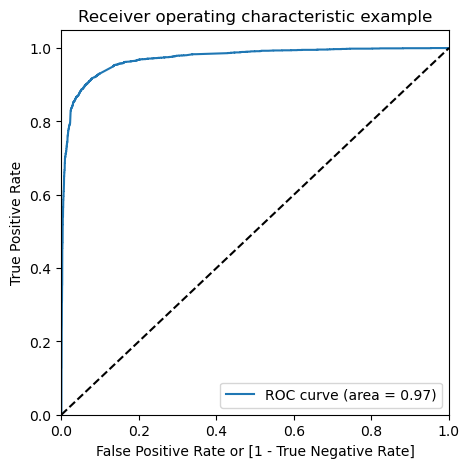

In [80]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

# Finding optimal value of the cut off

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,Covert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.140514,3009,0,0.140839,1,1,0,0,0,0,0,0,0,0
1,0,0.076839,1012,0,0.077367,1,0,0,0,0,0,0,0,0,0
2,0,0.002942,9226,0,0.002967,1,0,0,0,0,0,0,0,0,0
3,1,0.929232,4750,1,0.928848,1,1,1,1,1,1,1,1,1,1
4,1,0.998714,7987,1,0.998668,1,1,1,1,1,1,1,1,1,1


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.830420  0.973835  0.740589
0.2   0.2  0.888836  0.958299  0.845327
0.3   0.3  0.916234  0.920687  0.913444
0.4   0.4  0.922532  0.900654  0.936236
0.5   0.5  0.924579  0.883074  0.950576
0.6   0.6  0.923477  0.857318  0.964917
0.7   0.7  0.919383  0.829109  0.975928
0.8   0.8  0.895764  0.754293  0.984379
0.9   0.9  0.873878  0.686427  0.991293


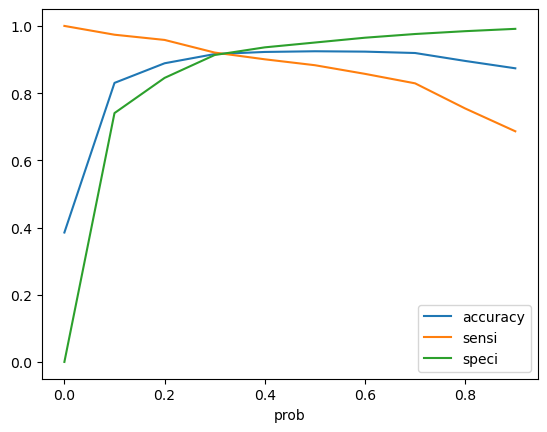

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [87]:
## From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,Covert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.140514,3009,0,0.140839,1,1,0,0,0,0,0,0,0,0,0
1,0,0.076839,1012,0,0.077367,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002942,9226,0,0.002967,1,0,0,0,0,0,0,0,0,0,0
3,1,0.929232,4750,1,0.928848,1,1,1,1,1,1,1,1,1,1,1
4,1,0.998714,7987,1,0.998668,1,1,1,1,1,1,1,1,1,1,1


# Precision trade cut off

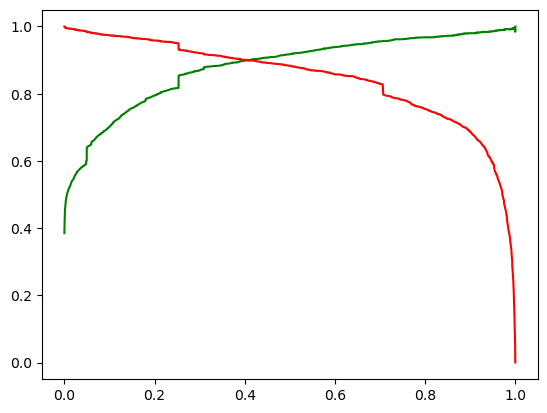

In [89]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [90]:
y_train_pred_final=y_train_pred_final.iloc[:, :3]
y_train_pred_final['predicted']=y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.27 else 0)
y_train_pred_final['Lead_Score']=y_train_pred_final.Convert_Prob.map(lambda x:round(x*100))
y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID,predicted,Lead_Score
0,0,0.140514,3009,0,14
1,0,0.076839,1012,0,8
2,0,0.002942,9226,0,0
3,1,0.929232,4750,1,93
4,1,0.998714,7987,1,100


In [91]:
#Evaluting modelperformance on training data
evalute_model(y_train_pred_final.Convert,y_train_pred_final.predicted,print_score=True)

Confusion Matrix:
 [[3534  371]
 [ 177 2269]]
Accuracy: 0.9137143756888679
Sensitivity: 0.9276369582992641
Specificity: 0.9049935979513444
Precision: 0.859469696969697


(0.9137143756888679, 0.9276369582992641, 0.9049935979513444, 0.859469696969697)

In [95]:
# Getting the predicted value on train set
x_test_sm=sm.add_constant(x_test[col])
y_test_pred=res.predict(x_test_sm)

y_test_df=pd.DataFrame(y_test)
y_test_pred_df=pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID']=y_test_df.index

y_predicted_final=pd.concat([y_test_df.reset_index(drop=True),y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted']=y_predicted_final.Converting_Probability.map(lambda x:1 if x>0.27 else 0)
y_predicted_final['Lead_Score']=y_predicted_final.Converting_Probability.map(lambda x:round(x*100))
y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,1.000000,1,100
1,1,1490,1.000000,1,100
2,0,7936,1.000000,1,100
3,1,4216,0.999918,1,100
4,0,3830,1.000000,1,100


In [96]:
#Evaluting modelperformance on test data
evalute_model(y_predicted_final.Converted,y_predicted_final.final_predicted,print_score=True)

Confusion Matrix:
 [[ 307 1427]
 [   3  986]]
Accuracy: 0.47484392214469334
Sensitivity: 0.9969666329625885
Specificity: 0.17704728950403692
Precision: 0.4086199751346871


(0.47484392214469334,
 0.9969666329625885,
 0.17704728950403692,
 0.4086199751346871)

# Final Model

In [105]:
#Build a logistic regression model and returns predicted values on training dataset
# when training data,test data and probability cutoff is given

def build_model_cutoff(x_train,y_train,x_test,y_text,cutoff=0.5):
    
    #Train model
    x_train_sm=sm.add_constant(x_train)
    logm=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
    res=logm.fit()
    
    y_train_pred=res_predict(x_train_sm).values.reshape(-1)
    
    
    y_train_pred_final=pd.DataFrame({'Prospect ID':y_train.index,'Converted':y_train.values,'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted']=y_train_pred_final.Convert_Probability.map(lambda x:1 if x> cutoff else 0)
    y_train_pred_final['Lead_Score']=y_train_pred_final.Convert_Probability.map(lambda x:round(x*100))
    print("-------------------------Result of training data-------------------")
    print(y_train_pred_final.head())

    
   #Predicting lead score on test data
    x_test.sm=sm.add_constant(x_test)
    y_test_pred=res.predict(x_test_sm)

    y_test_pred_final=pd.DataFrame({'Prospect ID':y_test.index,'Converted':y_test.values,'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted']=y_test_pred_final.Convert_Probability.map(lambda x:1 if x> cutoff else 0)
    y_test_pred_final['Lead_Score']=y_test_pred_final.Convert_Probability.map(lambda x:round(x*100))
    y_test_pred_final.rest_index(inplace=True,drop=True)
    print("-------------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("-------------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted,y_test_pred_final.Convert_Predicted,print_score=True)
    
    
    return y_test_pred_final


In [106]:
print("Features used in Final Model:",col)
print("-----------------------Feature Importance------------------")
print(res.params)

Features used in Final Model: Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Other_Specialization',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing